In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import io
%cd "E:\Chicago"

E:\Chicago


In [3]:
dataframe=pd.read_csv("Air_Traffic_Passenger_Statistics (1).csv")

In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50730 entries, 0 to 50729
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Activity Period              50730 non-null  int64 
 1   Operating Airline            50730 non-null  object
 2   Operating Airline IATA Code  50427 non-null  object
 3   Published Airline            50730 non-null  object
 4   Published Airline IATA Code  50427 non-null  object
 5   GEO Summary                  50730 non-null  object
 6   GEO Region                   50730 non-null  object
 7   Activity Type Code           50730 non-null  object
 8   Price Category Code          50730 non-null  object
 9   Terminal                     50730 non-null  object
 10  Boarding Area                50730 non-null  object
 11  Passenger Count              50730 non-null  int64 
dtypes: int64(2), object(10)
memory usage: 4.6+ MB


In [5]:
dataframe.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090


In [ ]:
# Time Series Data or IOT Data
# Time Series Data or IOT Data has Datetime or Date as a critical variable
# Multivariate Analysis variables extracted from date and date is deleted
# But in Time Series data Date variable is most critical variable which
# cannot be deleted
# Date - "YYYY-mm-dd" or datetime - "YYYY-mm-dd HH:MM:SS"
# 3 Types of Time Series Data
# 1) Univarite Time Series - Only 2 Variables - Date & y
# 2) Multivariate Time Series - Along with Date and Date extracted variables
# other independent variables will also be there.
# 3) Panel Data - Along with Date and other Independent Variables an ID
# variable will also be there (Company, Country, Region)

In [6]:
# Univariate Time series
airtraffic=dataframe[['Activity Period','Passenger Count']]

In [7]:
airtraffic['Activity Period']=airtraffic['Activity Period'].astype(str).apply(lambda x:f"{x[:4]}-{x[4:6]}")

C:\Users\Maheshamb\AppData\Local\Temp\ipykernel_13732\1789442878.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airtraffic['Activity Period']=airtraffic['Activity Period'].astype(str).apply(lambda x:f"{x[:4]}-{x[4:6]}")


In [8]:
airtraffic['Activity Period']=pd.to_datetime(airtraffic['Activity Period'],errors='coerce')

C:\Users\Maheshamb\AppData\Local\Temp\ipykernel_13732\3326523551.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airtraffic['Activity Period']=pd.to_datetime(airtraffic['Activity Period'],errors='coerce')


In [9]:
airtraffic['Activity Period'].head()

0   2005-07-01
1   2005-07-01
2   2005-07-01
3   2005-07-01
4   2005-07-01
Name: Activity Period, dtype: datetime64[ns]

In [10]:
# Resample Time Series into different Time Frequencies
# "60 Min" - hour ,"d" - Daily, "m" - monthly, "Q"=Quarterly, "A" - Annual
# Statistical Function typically sum() or mean() or median() must be given
# After resampling Date will be indexed into Row

In [11]:
airtraffic_monthly=airtraffic.resample("M",on="Activity Period").sum()

In [12]:
airtraffic_monthly.head()
# In Time series Data Row indexing of Date is compulsory

,Passenger Count
Activity Period,
2005-07-31,6451538
2005-08-31,6391732
2005-09-30,5481106
2005-10-31,5541430
2005-11-30,5234666


<Axes: xlabel='Activity Period'>

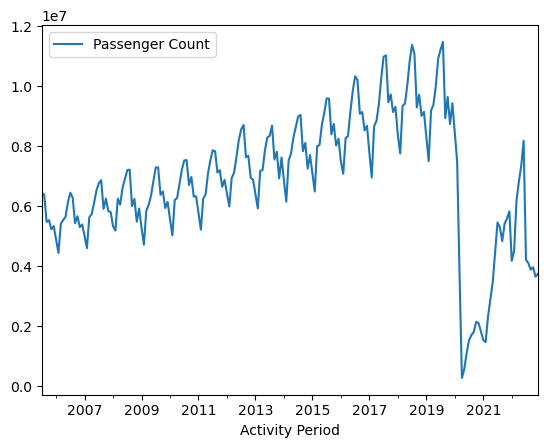

In [13]:
airtraffic_monthly.plot(kind='line')

In [14]:
# Univariate Time series Forecasting - Data must be stationary.
# Stationary means constant mean, constant variance and constant covariance.
# Typically Time should not effect data is stationarity
# Time series with trends, or with seasonality, are not stationary - 
# The trend and seasonality will affect the value of the time series at different time
# Trends - up,Down, Horizontal or neutral
# Seasonality - Based on 4 seasons - Summer, Rainy, Spring, Winter

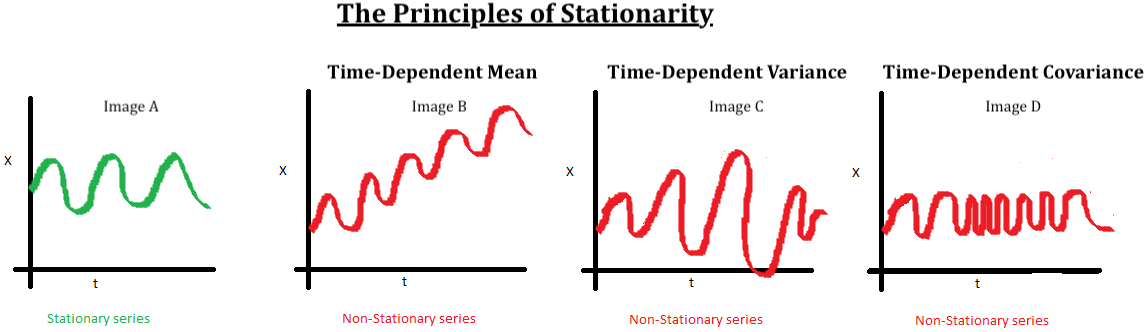

In [15]:
# Augmented Dickey fuller test of stationarity - Identifies wheather the data is stationary or not
# Null - Unit Root Present or Data is Not stationary
# Alt - No Unit Root or Data is Stationary

# A unit root process is a data- generating process whose first difference is stationary.
# In other words, a unit root process yt has the form.
# yt = yt-1 + stationary process.

# Interpretation is based on p-value
# p-value less than 0.05, Reject Null
# p-value greater than 0.05, Fail to Reject Null

In [16]:
from statsmodels.tsa.stattools import adfuller

In [17]:
adfuller(airtraffic_monthly)

# Since p-value=0.194351 is greater than 0.05, Fail to Reject Null

(-2.233388375783796,
 0.1943512840260695,
 13,
 196,
 {'1%': -3.464161278384219,
  '5%': -2.876401960790147,
  '10%': -2.5746921001665974},
 5779.9582584418)

In [18]:
from statsmodels.tsa.stattools import kpss

# Kwiatkowski-Phillips-Schmidt-Shin(KPSS) test for stationarity.
# null hypothesis that x is level or trend stationary.
# alt hypothesis that x is not level or not trend stationary.

In [19]:
kpss(airtraffic_monthly)

C:\Users\Maheshamb\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


(0.30238701078218794,
 0.1,
 9,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [20]:
# If Data is not stationary Differencing must be done
# y                 - 1,2,3,4,5,6,7,8,9,10
# lag 1 of y        -  1,2,3,4,5,6,7,8,9,10
# lag 2 of y        -   1,2,3,4,5,6,7,8,9,10


In [21]:
airtraffic_monthly_diff=airtraffic_monthly.diff()  #differencing

In [22]:
airtraffic_monthly_diff=airtraffic_monthly_diff.dropna()

<Axes: xlabel='Activity Period'>

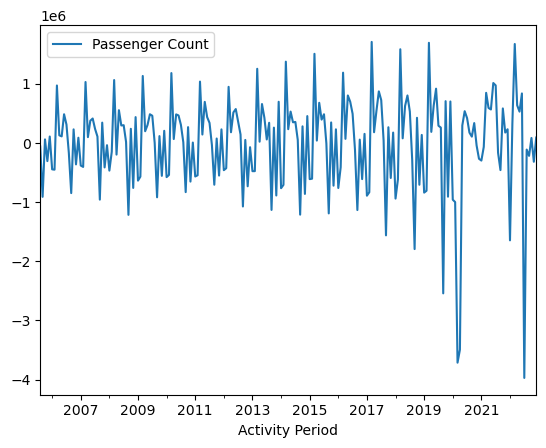

In [23]:
airtraffic_monthly_diff.plot(kind='line')

In [24]:
adfuller(airtraffic_monthly_diff)
# since p value =0.0018386 is less than 0.05, Reject Null
# Differenced data is Stationary

(-3.92793060344133,
 0.0018386429032125433,
 12,
 196,
 {'1%': -3.464161278384219,
  '5%': -2.876401960790147,
  '10%': -2.5746921001665974},
 5754.590362505791)

In [25]:
kpss(airtraffic_monthly_diff)
# Since p value =0.1 is greater than 0.05, Fail to reject null

C:\Users\Maheshamb\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


(0.05525286651495517,
 0.1,
 2,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [26]:
# Decomposition of Time series - Breaking Time series into components
# a) Trend - up, Down, Neutral or Horizontal
# b) seasonal - Bases on 4 seasons
# c) Cyclicality - Long Term Trend (8-12 years) - Business cycle
# d) Random or Residual - Error y and lagged values of y

# Holt - winters method of decomposition
# Additive model (Non Seasonal Data) - yt = Tt+St+Ct+Rt
# Multiplicative Model (Seasonal Data) - yt = Tt*St*Ct*Rt

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose

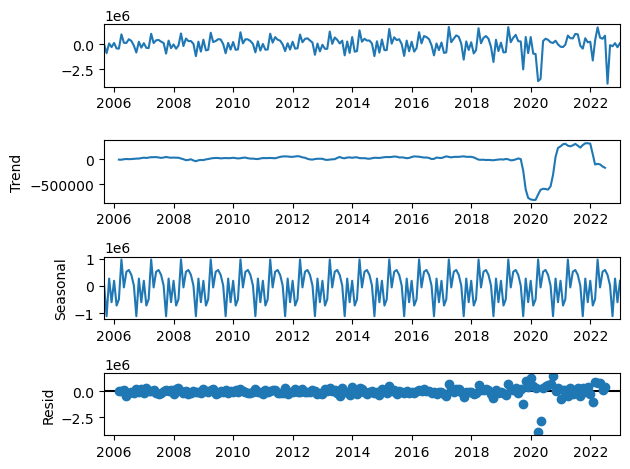

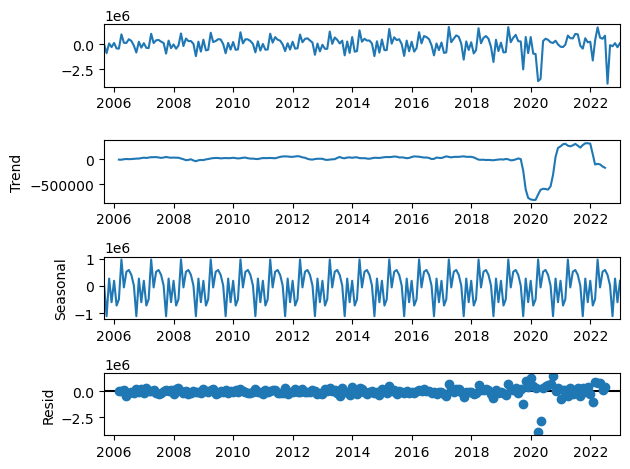

In [28]:
seasonal_decompose(airtraffic_monthly_diff).plot()

In [29]:
# Univariate Time series Forecasting - Many methods are there like
# Simple moving Average, Exponential Moving Average, Exponential smoothing
# Holt winters and most importantly ARIMA

# Autoregressive Integrated Moving Average (ARIMA) is a linear regression
# Model with 2 equations for forecasting for future time periods based
# on historical time periods

# Non seasonal ARIMA - ARIMA(p,d,q) - p,d,q are lags between 0,0,0 till 5,2,5
# seasonal ARIMA - SARIMAX (p,d,q)[P,D,Q][time frequency]
# [P,D,Q][time frequency] are seasonal parameters

# AR(p) - Autoregressive is linear relationship between y and lagged values of y.

# I(d) - Integrated refers to differencing to be done to bring data to stationary

# MA(q) - Moving Average is linear relationship between errors and lagged errors or residuals

# In ARIMA identifying the values for p,d,q are very critical
# d is the differencing that is done that lies between 0 to 2.
# ACF plot or Autocorrelation plot identifies the lag value for MA(Q)
# PACF of partial Autocorrelation plot identifies 

# Blue area depicts 95% confidence level and indicates significance
# Anything within blue area is statistically close to zero and anything above is statistically close to non zero

# from ACF plot the first lag where there is a big change - value of q
# From PACF plot the first lag where it becomes negative - value of p

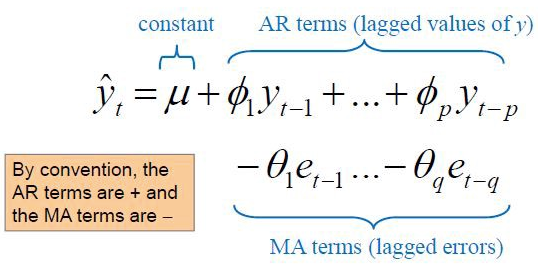

In [30]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

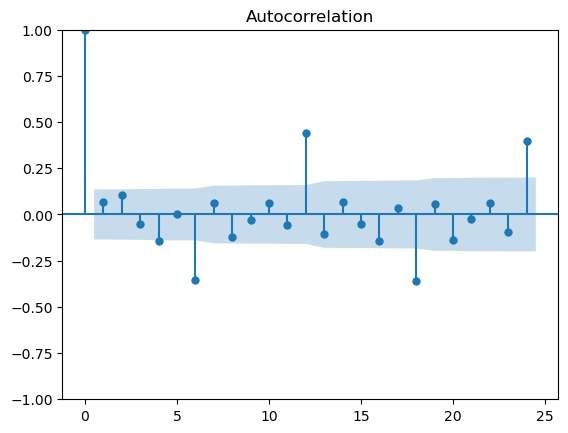

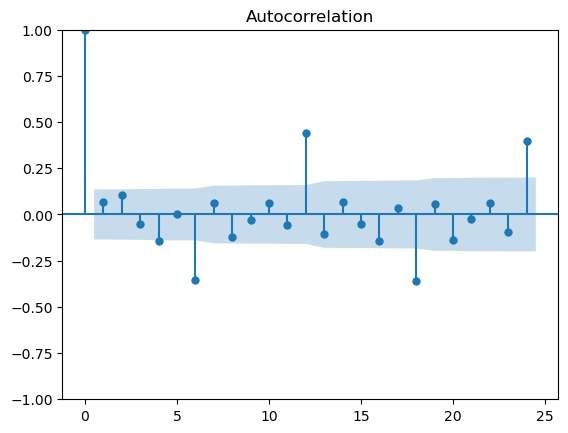

In [31]:
plot_acf(airtraffic_monthly_diff)

C:\Users\Maheshamb\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


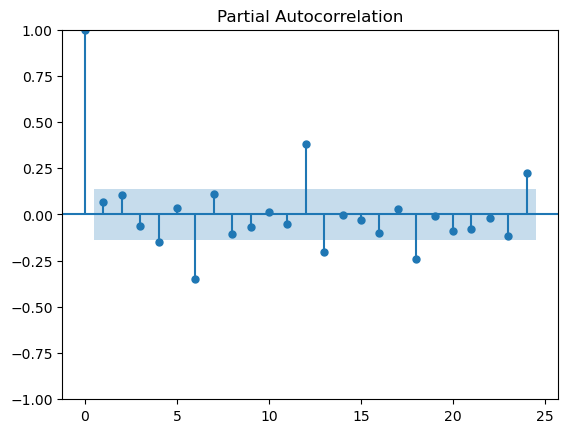

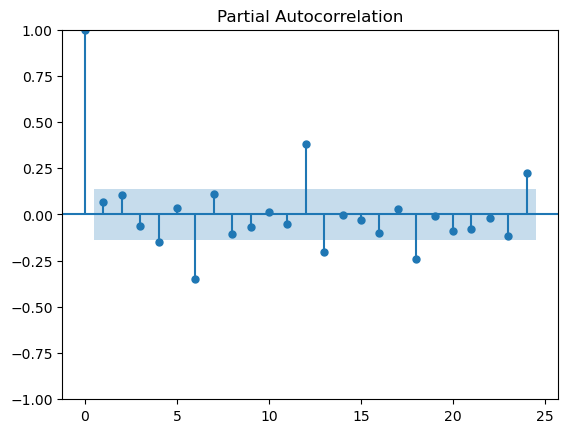

In [32]:
plot_pacf(airtraffic_monthly_diff)

In [33]:
!pip install pmdarima

In [34]:
# Auto ARIMA is a funtion in pmdarima library that tries all 
# combinations of p,d,q values from 0,0,0 till 5,2,5
# Lagorder combination of p,d,q that has the least Alkaikes Information
# Criterion (AIC) is the best fit lag order
# By default builds SARIMAX model.

In [35]:
from pmdarima.arima import auto_arima

In [36]:
arima_model=auto_arima(airtraffic_monthly,start_p=0,start_q=0)

In [37]:
arima_model.summary()

# SARIMAX(0, 1, 0) - Non Seasonal Model
# AIC - 6279.860
# P>|z| must be less than 0.05

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  210
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -3138.930
Date:                Mon, 12 Jun 2023   AIC                           6279.860
Time:                        13:15:07   BIC                           6283.202
Sample:                    07-31-2005   HQIC                          6281.211
                         - 12-31-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      6.466e+11   3.27e+10     19.753      0.000    5.82e+11    7.11e+11
===================================================================================
Ljung-Box (L1) (Q):                   0.90   Jarque-Bera (JB):               319.24
Prob(Q):                              0.34   Prob(JB):                         0.00
Heteroskedasticity (H):               4.20   Skew:                            -1.46
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [38]:
# Ljung Box Test of residuals

# Null - Model Doesnot show Lack of fit or Model is fine
# Alt - Model Does show Lack of Fit or Model is Fnot Fine

# p- Value must be greater than 0.05, Failto Reject Null

# since prob(Q): 0.34 is greater than 0.05, Fail to Reject Null

In [39]:
arima_model.predict(n_periods=24)

2023-01-31    3746158.0
2023-02-28    3746158.0
2023-03-31    3746158.0
2023-04-30    3746158.0
2023-05-31    3746158.0
2023-06-30    3746158.0
2023-07-31    3746158.0
2023-08-31    3746158.0
2023-09-30    3746158.0
2023-10-31    3746158.0
2023-11-30    3746158.0
2023-12-31    3746158.0
2024-01-31    3746158.0
2024-02-29    3746158.0
2024-03-31    3746158.0
2024-04-30    3746158.0
2024-05-31    3746158.0
2024-06-30    3746158.0
2024-07-31    3746158.0
2024-08-31    3746158.0
2024-09-30    3746158.0
2024-10-31    3746158.0
2024-11-30    3746158.0
2024-12-31    3746158.0
Freq: M, dtype: float64

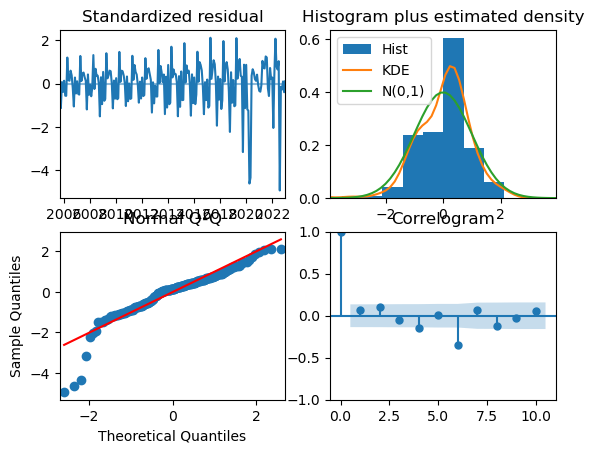

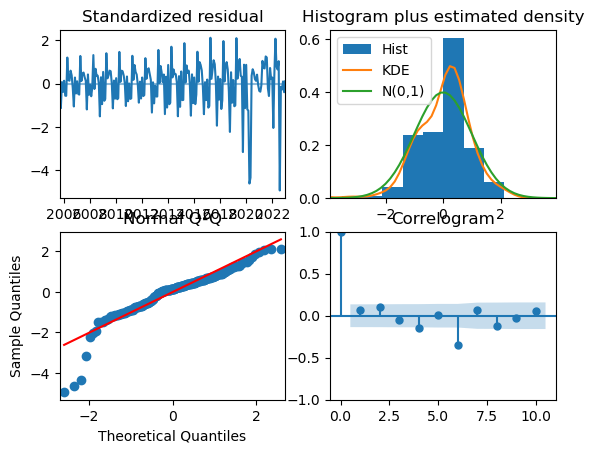

In [40]:
arima_model.plot_diagnostics()

In [41]:
index_of_fc=pd.date_range(airtraffic_monthly.index[-1],periods=24,freq='M')

In [42]:
arimapredict=pd.DataFrame(arima_model.predict(n_periods=24))

In [43]:
arimapredict.index=index_of_fc

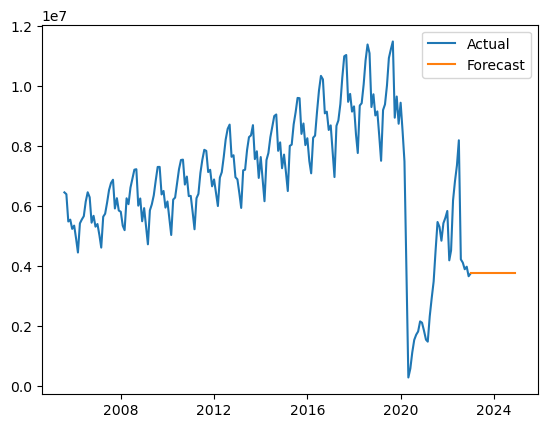

In [44]:
plt.plot(airtraffic_monthly,label='Actual')
plt.plot(arimapredict,label='Forecast')
plt.legend()
plt.show()

In [45]:
from prophet import Prophet

In [47]:
airtraffic_monthly=airtraffic_monthly.reset_index()

In [48]:
airtraffic_monthly.columns=['ds','y']

In [51]:
m=Prophet()
m.fit(airtraffic_monthly)

13:16:35 - cmdstanpy - INFO - Chain [1] start processing
13:16:35 - cmdstanpy - INFO - Chain [1] done processing


In [53]:
future=m.make_future_dataframe(periods=24)

In [54]:
forecast=m.predict(future)
np.round(forecast[['ds','yhat','yhat_lower','yhat_upper']]).tail()

,ds,yhat,yhat_lower,yhat_upper
229,2023-01-20,3376095.0,1544705.0,5157149.0
230,2023-01-21,3513370.0,1646912.0,5337833.0
231,2023-01-22,3632760.0,1590133.0,5342779.0
232,2023-01-23,3728040.0,1864329.0,5620925.0
233,2023-01-24,3793485.0,1855355.0,5712183.0


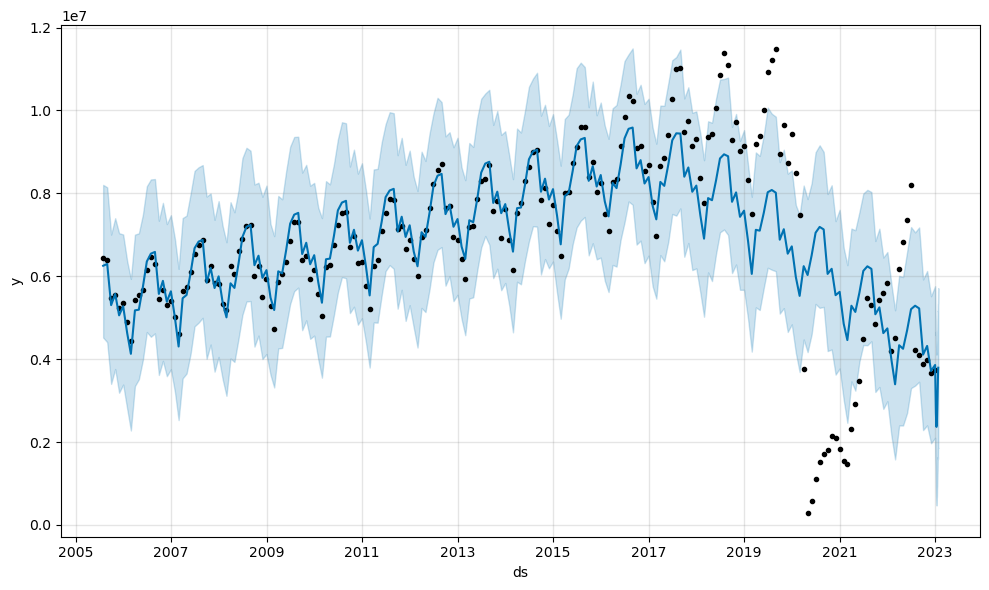

In [55]:
fig1=m.plot(forecast)

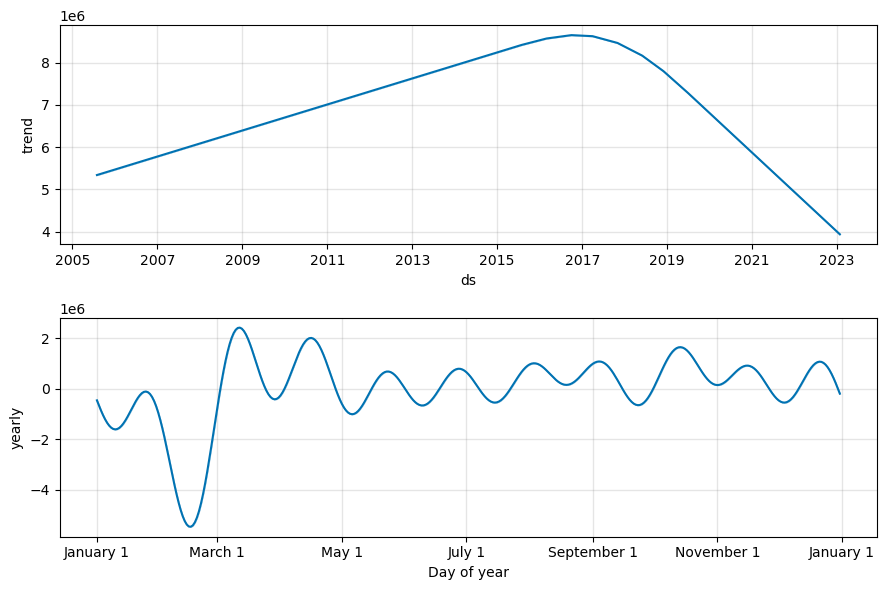

In [56]:
fig2=m.plot_components(forecast)

In [3]:
from prophet.plot import plot_plotly, plot_components_plotly
plot_plotly(m, forecast)

NameError: name 'm' is not defined